# TODO:

- ~~Separate mass and vel profiles into their own grids~~
- ~~Find logical way to tile the images to reduce number of pages needed for just plots~~
- ~~Find minimum number of redshifts needed to plot~~
- Do the same for the power spectra
- ~~Change the >V_max to just >V~~
- ~~Figure out why extra stuff is being plotted in ratios for 00~~
- python 3.7.11, mpl version 3.4.3

In [3]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import glob
import sys
sys.path.append('../../py/')

from cosmoSim import cosmoSim

In [4]:
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams['font.size']=10

ALPHA=0.8

FIG_HEIGHT = 11
FIG_WIDTH = 8.5

FIGSIZE=[FIG_WIDTH,FIG_HEIGHT]
DPI=300

snap_ranges = [
    [2, 3],
    [4, 5],
    [6, 7]
    ]

In [5]:
outpath = '../../plots/plots_L3N256_vkick/grid/'

try:
    os.mkdir(outpath)
except:
    print(f'{outpath} already exists!')

tcDM_search0 = '../../data_prods/run_2cDM_L3N256_DM_power00*Vkick*'
tcDM_search1 = '../../data_prods/run_2cDM_L3N256_DM_powerm2m2*Vkick*'

CDM_runs = [ 'run_CDM_L3N256_DM' ]

tcDM_runs0 = [ os.path.basename(x) for x in sorted(glob.glob(tcDM_search0)) ]
tcDM_runs0.append('run_2cDM_L3N256_DM_power00_sigma1')

tcDM_runs1 = [ os.path.basename(x) for x in sorted(glob.glob(tcDM_search1)) ]
tcDM_runs1.append('run_2cDM_L3N256_DM_powerm2m2_sigma1')

tcDM_runs = tcDM_runs0 + tcDM_runs1

runs = CDM_runs + tcDM_runs0 + tcDM_runs1


../../plots/plots_L3N256_vkick/grid/ already exists!


In [6]:
tcDM_runs

['run_2cDM_L3N256_DM_power00_sigma1_dir_0_Vkick20.00',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_1_Vkick25.83',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_2_Vkick33.36',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_3_Vkick43.09',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_4_Vkick55.65',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_5_Vkick71.88',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_6_Vkick92.83',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_7_Vkick119.90',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_8_Vkick154.85',
 'run_2cDM_L3N256_DM_power00_sigma1_dir_9_Vkick200.00',
 'run_2cDM_L3N256_DM_power00_sigma1',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_0_Vkick20.00',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_1_Vkick25.83',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_2_Vkick33.36',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_3_Vkick43.09',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_4_Vkick55.65',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_5_Vkick71.88',
 'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_6_Vkick92.83',
 'run_2cDM

In [7]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l    

In [8]:
Vkicks = [ cosmoSim(x).Vkick for x in tcDM_runs ]

c_norm = matplotlib.colors.LogNorm(vmin=np.amin(Vkicks), vmax=np.amax(Vkicks))
c_map = matplotlib.cm.plasma

s_map = matplotlib.cm.ScalarMappable(cmap=c_map, norm=c_norm)

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')


In [15]:
def the_profile_plotting(snap_nos, function, zz=False, m2m2=False, save=False):
    fig = plt.figure(figsize=FIGSIZE)
    gs = fig.add_gridspec(len(snap_ranges), len(snap_ranges[0]), hspace=0, wspace=0)
    axes = gs.subplots(sharex='col', sharey='row')
    for i, snap_range in enumerate(snap_ranges):
        for j, snap_no in enumerate(snap_range):
            ax = axes[i]
            for run_n in runs:
                run = cosmoSim(run_n)
                if function == 'mass':
                    bins, counts = run.load_mass_profile(run.redshifts[snap_no])
                elif function == 'velocity':
                    bins, counts = run.load_vel_profile(run.redshifts[snap_no])
                else:
                    raise Exception('No function specified!')
                if run.dm_type == '2cDM':
                    if (run.powerLaws == [-2, -2]) and m2m2:
                        ax[j].plot(bins, counts, alpha=ALPHA, color=s_map.to_rgba(run.Vkick), linestyle='dashdot')
                    if (run.powerLaws == [0, 0]) and zz:
                        ax[j].plot(bins, counts, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
                else:
                    ax[j].plot(bins, counts, alpha=ALPHA, color='k', linestyle='dashed')
            for a in ax:
                a.set_yscale("log")
                a.set_xscale("log")
                if function == 'mass':
                    a.set_xlim(10**6, 10**11)
                if function == 'velocity':
                    a.set_xlim(2, 10**2)
                a.grid(True, which="both", ls="-")
                a.set_aspect( 'auto', adjustable='box' )
            ax[j].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
            ax[j].legend()

    if function == 'mass':   
        fig.supxlabel("Halo Mass ($M_{\odot}$)")
        fig.supylabel("$N\\left(>M\\right)$")
    elif function == 'velocity':
        fig.supxlabel("$V_{max}$ [km s$^{-1}$]")
        fig.supylabel("$N\\left(>V\\right)$")

    ax = axes[-1, -1]
    #print(ax.get_xticks())
    
    if function == 'mass': ax.set_xticks(ax.get_xticks()[3:])
    
    if zz:
        ax.plot([],[], label='2cDM [0, 0], $\sigma_0=$ 1', color='k')
    if m2m2:
        ax.plot([],[], label='2cDM [-2, -2], $\sigma_0=$ 1', color='k', linestyle='dashdot')

    ax.plot([],[], label='CDM', color='k', linestyle='dashed')

    ax.legend()

    axins = inset_axes(ax, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="200%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.3, 1, 1),
               bbox_transform=ax.transAxes,
               borderpad=0,
               )

    cbar = fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]', cax=axins)
    fig.tight_layout()
    fname = outpath + f'grid_{function}_profiles'
    if zz: fname += '_with00'
    if m2m2: fname += '_withm2m2'
    fname += '.pdf'
    if save: plt.savefig(fname, dpi=DPI, bbox_inches='tight')
    plt.show()

def the_profile_ratio_plotting(snap_ranges, function, zz=False, m2m2=False, save=False):
    fig = plt.figure(figsize=FIGSIZE)
    gs = fig.add_gridspec(len(snap_ranges), len(snap_ranges[0]), hspace=0, wspace=0)
    axes = gs.subplots(sharex='col', sharey='row')
    for i, snap_range in enumerate(snap_ranges):
        for j, snap_no in enumerate(snap_range):
            cdm_run = cosmoSim(CDM_runs[0])
            
            if function == 'mass':
                lims, c_interp = cdm_run.interp_mass_profile(cdm_run.redshifts[snap_no])
            elif function == 'velocity':
                lims, c_interp = cdm_run.interp_vels_profile(cdm_run.redshifts[snap_no])
            else:
                raise Exception('No function specified!')
                           
            ax = axes[i]
            for run_n in tcDM_runs:
                run = cosmoSim(run_n)
                
                if function == 'mass':
                    temp_lims, _ = run.interp_mass_profile(run.redshifts[snap_no])
                elif function == 'velocity':
                    temp_lims, _ = run.interp_vels_profile(run.redshifts[snap_no])

                if temp_lims[0] > lims[0]: lims[0] = temp_lims[0]
                if temp_lims[1] < lims[1]: lims[1] = temp_lims[1]

            bins = np.geomspace(lims[0], lims[1], num=1000)
            c_samples = np.array([ c_interp(x) for x in bins ])
            for run_n in tcDM_runs:
                run = cosmoSim(run_n)

                if function == 'mass':
                    _, interp = run.interp_mass_profile(run.redshifts[snap_no])
                elif function == 'velocity':
                    _, interp = run.interp_vels_profile(run.redshifts[snap_no])
                
                interp_samples = np.array([ interp(x) for x in bins ])
                if (run.powerLaws == [-2, -2]) and m2m2:
                    ax[j].plot(bins, interp_samples/c_samples, alpha=ALPHA, color=s_map.to_rgba(run.Vkick), linestyle='dashdot')
                if (run.powerLaws == [0, 0]) and zz:
                    ax[j].plot(bins, interp_samples/c_samples, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
            
            for a in ax:
                a.set_xscale("log")
                a.grid(True, which="both", ls="-")
                a.set_ylim(0, 1.5)
                a.set_aspect( 'auto', adjustable='box' )
                
            ax[j].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
            ax[j].legend()
    
    if function == 'mass':
        fig.supxlabel("Halo Mass ($M_{\odot}$)")
        fig.supylabel("$N_{2cDM}\\left(>M\\right)/N_{CDM}\\left(>M\\right)$")
    elif function == 'velocity':
        fig.supxlabel("$V_{max}$ [km s$^{-1}$]")
        fig.supylabel("$N_{2cDM}\\left(>V\\right)/N_{CDM}\\left(>V\\right)$")

    ax = axes[-1, -1]
    #print(ax.get_xticks())
    
    #if function == 'mass': ax.set_xticks(ax.get_xticks()[3:])
    
    if zz:
        ax.plot([],[], label='2cDM [0, 0], $\sigma_0=$ 1', color='k')
    if m2m2:
        ax.plot([],[], label='2cDM [-2, -2], $\sigma_0=$ 1', color='k', linestyle='dashdot')

    ax.plot([],[], label='CDM', color='k', linestyle='dashed')

    ax.legend()

    axins = inset_axes(ax, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="200%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.3, 1, 1),
               bbox_transform=ax.transAxes,
               borderpad=0,
               )

    cbar = fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]', cax=axins)
    fig.tight_layout()
    fname = outpath + f'grid_{function}_profiles_ratios'
    if zz: fname += '_with00'
    if m2m2: fname += '_withm2m2'
    fname += '.pdf'
    if save: plt.savefig(fname, dpi=DPI, bbox_inches='tight')
    plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

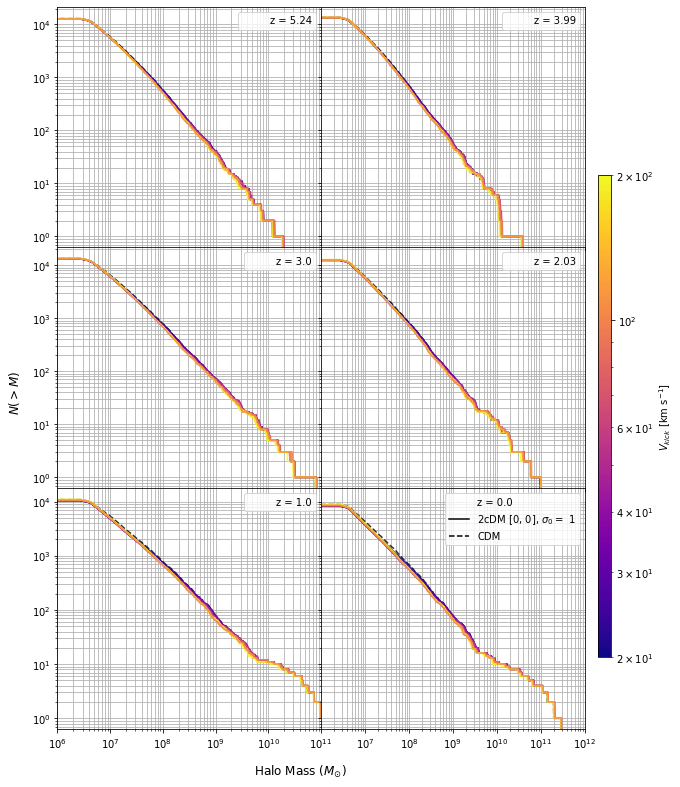

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

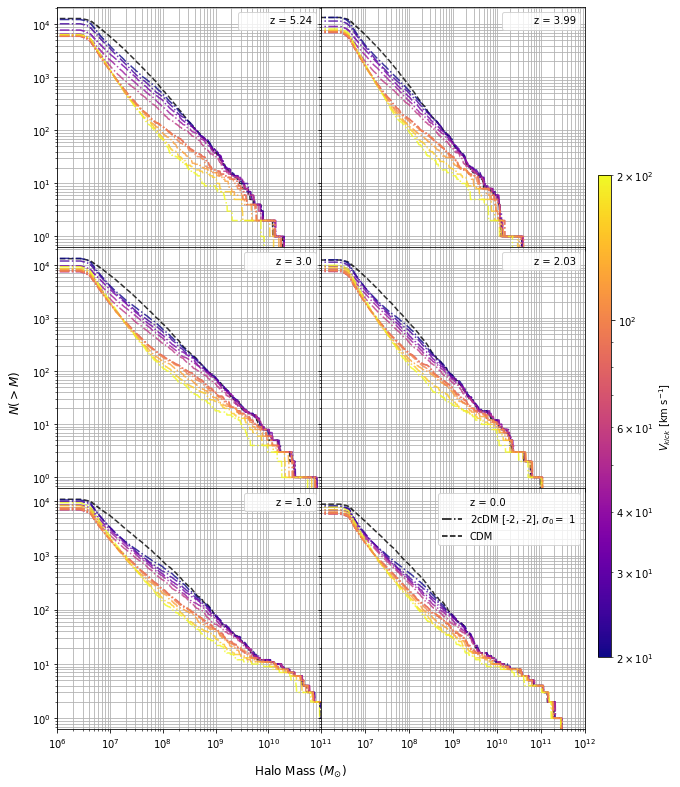

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

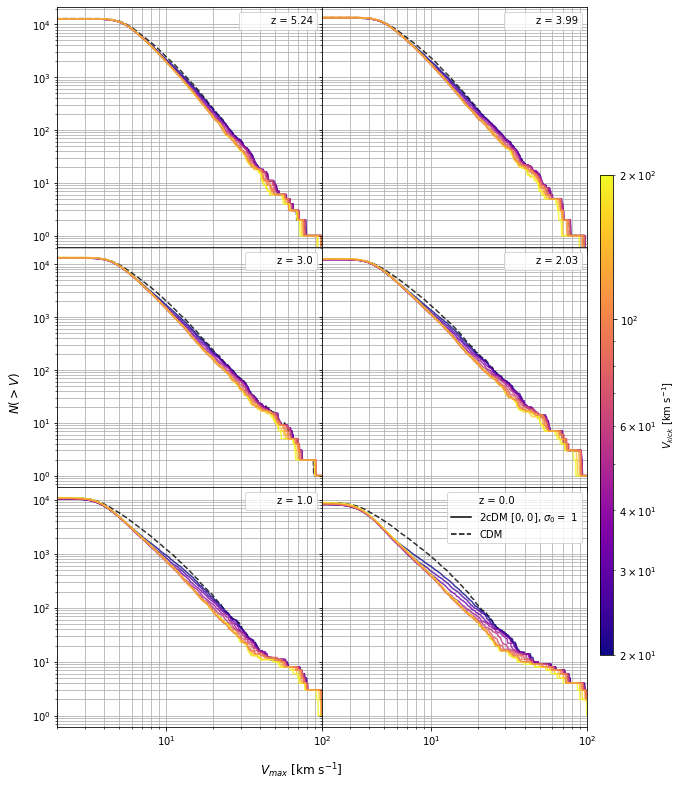

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

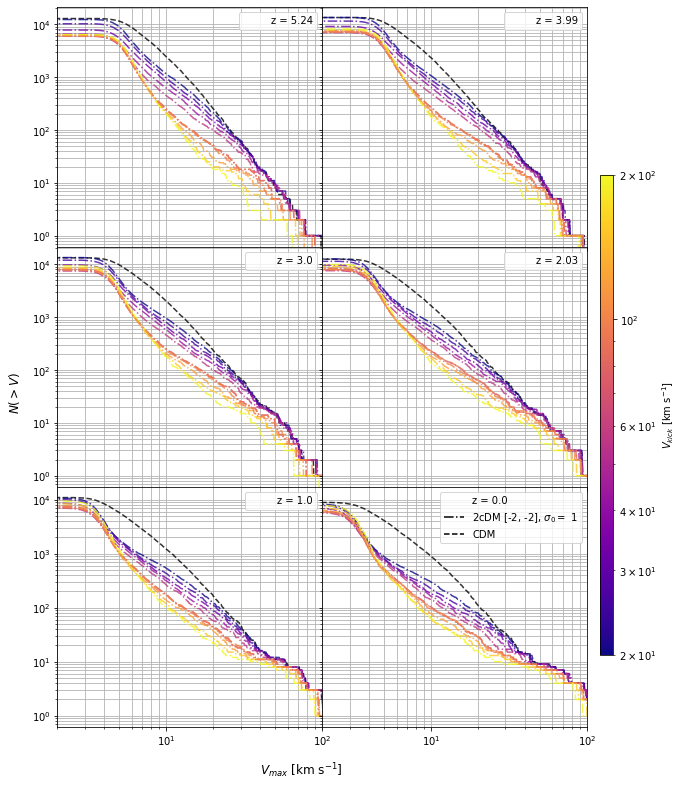

In [10]:
the_profile_plotting(snap_ranges, 'mass', zz=True, m2m2=False, save=True)
the_profile_plotting(snap_ranges, 'mass', zz=False, m2m2=True, save=True)
the_profile_plotting(snap_ranges, 'velocity', zz=True, m2m2=False, save=True)
the_profile_plotting(snap_ranges, 'velocity', zz=False, m2m2=True, save=True)

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: di

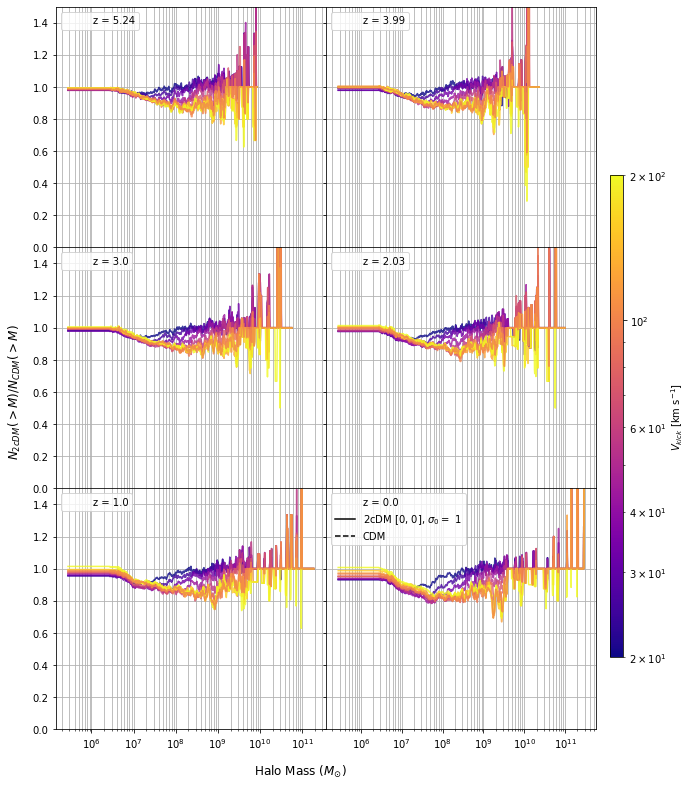

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

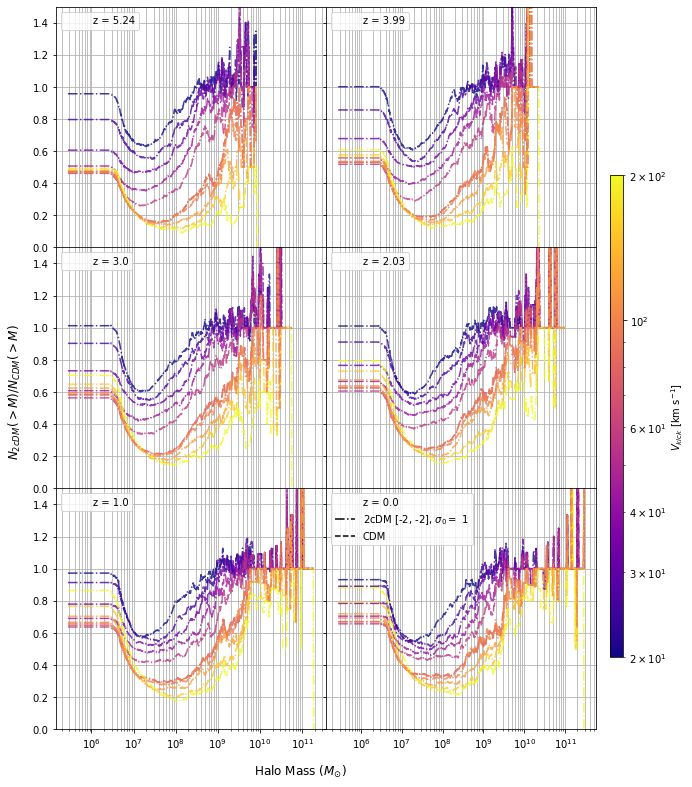

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

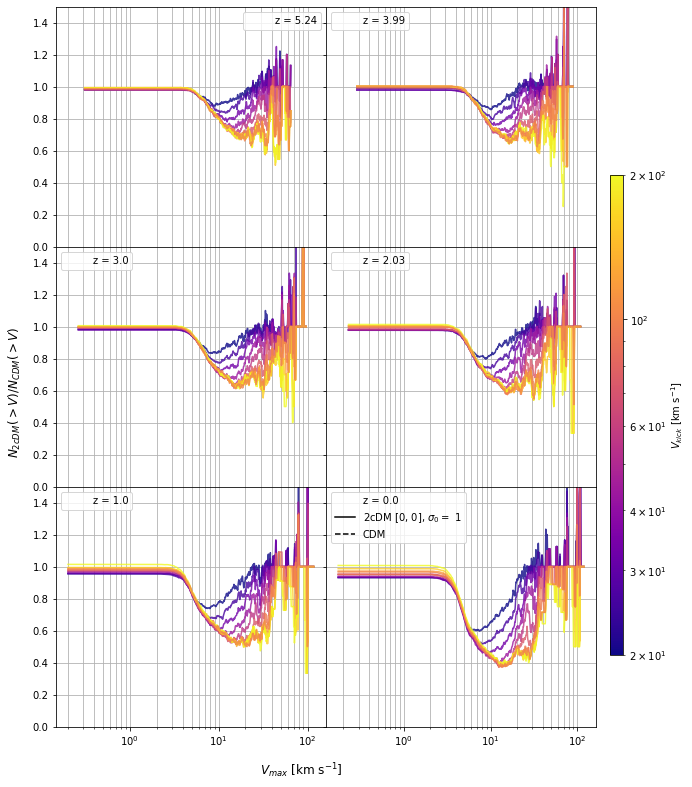

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

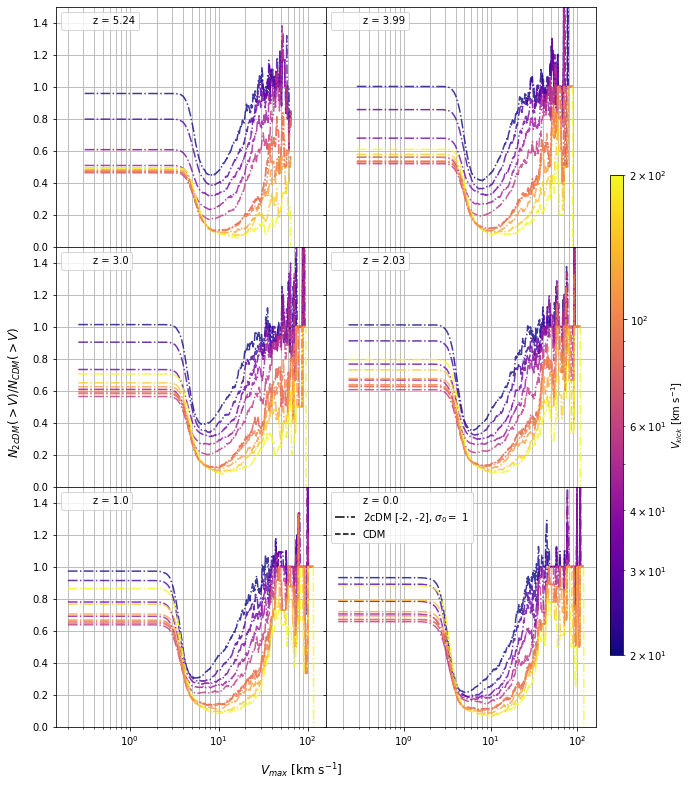

In [16]:
the_profile_ratio_plotting(snap_ranges, 'mass', zz=True, m2m2=False, save=True)
the_profile_ratio_plotting(snap_ranges, 'mass', zz=False, m2m2=True, save=True)
the_profile_ratio_plotting(snap_ranges, 'velocity', zz=True, m2m2=False, save=True)
the_profile_ratio_plotting(snap_ranges, 'velocity', zz=False, m2m2=True, save=True)

In [30]:
def the_power_spectra_plotting(snap_nos, zz=False, m2m2=False, save=False):
    fig = plt.figure(figsize=FIGSIZE)
    gs = fig.add_gridspec(len(snap_ranges), len(snap_ranges[0]), hspace=0, wspace=0)
    axes = gs.subplots(sharex='col', sharey='row')
    for i, snap_range in enumerate(snap_ranges):
        for j, snap_no in enumerate(snap_range):
            ax = axes[i]
            for run_n in runs:
                run = cosmoSim(run_n)
                bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])

                if run.dm_type == '2cDM':
                    if (run.powerLaws == [-2, -2]) and m2m2:
                        ax[j].plot(bins, dk, alpha=ALPHA, color=s_map.to_rgba(run.Vkick), linestyle='dashdot')
                    if (run.powerLaws == [0, 0]) and zz:
                        ax[j].plot(bins, dk, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
                else:
                    ax[j].plot(bins, dk, alpha=ALPHA, color='k', linestyle='dashed')

                ax[j].vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashed')
                
            for a in ax:
                a.set_yscale("log")
                a.set_xscale("log")
                a.set_xlim(10**0, 10**3)
                a.set_ylim(10**0, 10**7 + 2*10**7)
                a.grid(True, which="both", ls="-")
                a.set_aspect( 'auto', adjustable='box' )
            ax[j].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
            ax[j].legend()

    fig.supxlabel('k [$h$ Mpc$^{-1}$]')
    fig.supylabel('$\Delta^{2}(k)$')

    for i, a in enumerate(axes[0]):
        sax = a.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
        if i == len(axes[0]) // 2: sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')


    sax.set_xticks([1e-3, 1e-2, 1e-1])

    ax = axes[0,0]
    topax = inset_axes(ax, # here using axis of the lowest plot
            height="5%",  # width = 5% of parent_bbox width
            width="200%",  # height : 340% good for a (4x4) Grid
            loc='upper right',
            bbox_to_anchor=(1.05, 0.3, 1, 1),
            bbox_transform=ax.transAxes,
            borderpad=0,
            )
    topax.set_xticks([])
    topax.set_yticks([])
    [topax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
    topax.patch.set_visible(False)
    topax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
    topax.tick_params(top=True)

    ax = axes[-1, -1]
    
    ax.set_xticks([1e1, 1e2, 1e3])

    if zz:
        ax.plot([],[], label='2cDM [0, 0], $\sigma_0=$ 1', color='k')
    if m2m2:
        ax.plot([],[], label='2cDM [-2, -2], $\sigma_0=$ 1', color='k', linestyle='dashdot')

    ax.plot([],[], label='CDM', color='k', linestyle='dashed')

    ax.text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')

    ax.legend()

    axins = inset_axes(ax, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="200%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.3, 1, 1),
               bbox_transform=ax.transAxes,
               borderpad=0,
               )

    cbar = fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]', cax=axins)
    fig.tight_layout()
    fname = outpath + f'grid_power_spectra'
    if zz: fname += '_with00'
    if m2m2: fname += '_withm2m2'
    fname += '.pdf'
    if save: plt.savefig(fname, dpi=DPI, bbox_inches='tight')
    plt.show()

def the_power_spectra_ratio_plotting(snap_ranges, zz=False, m2m2=False, save=False):
    fig = plt.figure(figsize=FIGSIZE)
    gs = fig.add_gridspec(len(snap_ranges), len(snap_ranges[0]), hspace=0, wspace=0)
    axes = gs.subplots(sharex='col', sharey='row')
    for i, snap_range in enumerate(snap_ranges):
        for j, snap_no in enumerate(snap_range):
            cdm_run = cosmoSim(CDM_runs[0])
            cbins, cpk, cdk, ck_ny = cdm_run.load_power_spectra(cdm_run.redshifts[snap_no])               
            ax = axes[i]

            for run_n in tcDM_runs:
                run = cosmoSim(run_n)
                bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])
                if (run.powerLaws == [-2, -2]) and m2m2:
                    ax[j].plot(bins, pk/cpk, alpha=ALPHA, color=s_map.to_rgba(run.Vkick), linestyle='dashdot')
                if (run.powerLaws == [0, 0]) and zz:
                    ax[j].plot(bins, pk/cpk, alpha=ALPHA, color=s_map.to_rgba(run.Vkick))
                ax[j].vlines(k_ny, -3, 3, colors='m', linestyles='dashed')
            
            for a in ax:
                a.set_xscale('log')
                a.set_xlim(10**0, 10**3)
                a.set_ylim(0, 1.3)
                a.grid(True, which="both", ls="-")
                a.set_aspect( 'auto', adjustable='box' )
                
            ax[j].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
            ax[j].legend()

    fig.supxlabel('k [$h$ Mpc$^{-1}$]')
    fig.supylabel('$\Delta^{2}(k)$')

    for a in axes[0]:
        sax = a.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))

    sax.set_xticks([1e-3, 1e-2, 1e-1])

    ax = axes[0,0]
    topax = inset_axes(ax, # here using axis of the lowest plot
            height="5%",  # width = 5% of parent_bbox width
            width="200%",  # height : 340% good for a (4x4) Grid
            loc='upper right',
            bbox_to_anchor=(1.05, 0.3, 1, 1),
            bbox_transform=ax.transAxes,
            borderpad=0,
            )
    topax.set_xticks([])
    topax.set_yticks([])
    [topax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
    topax.patch.set_visible(False)
    topax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
    topax.tick_params(top=True)

    ax = axes[-1, -1]
    
    ax.set_xticks([1e1, 1e2, 1e3])

    if zz:
        ax.plot([],[], label='2cDM [0, 0], $\sigma_0=$ 1', color='k')
    if m2m2:
        ax.plot([],[], label='2cDM [-2, -2], $\sigma_0=$ 1', color='k', linestyle='dashdot')

    ax.plot([],[], label='CDM', color='k', linestyle='dashed')

    ax.text(10**2, 0.2, '$k_{Nyquist}$')

    ax.legend()

    axins = inset_axes(ax, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="200%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.3, 1, 1),
               bbox_transform=ax.transAxes,
               borderpad=0,
               )

    cbar = fig.colorbar(s_map, label='$V_{kick}$ [km s$^{-1}$]', cax=axins)
    fig.tight_layout()
    fname = outpath + f'grid_power_spectra_ratios'
    if zz: fname += '_with00'
    if m2m2: fname += '_withm2m2'
    fname += '.pdf'
    if save: plt.savefig(fname, dpi=DPI, bbox_inches='tight')
    plt.show()

In [ ]:
the_power_spectra_plotting(snap_ranges, zz=True, m2m2=False, save=True)
the_power_spectra_plotting(snap_ranges, zz=False, m2m2=True, save=True)
the_power_spectra_ratio_plotting(snap_ranges, zz=True, m2m2=False, save=True)
the_power_spectra_ratio_plotting(snap_ranges, zz=False, m2m2=True, save=True)

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
